In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w, d = {}, {}
T, w['H2_4p3/2-5s'], w['H2_4p1/2-5s'], d['H2_4p3/2-5s'], d['H2_4p1/2-5s'] = np.loadtxt('./param_KH2_4p_5s.dat').T
T, w['He_4p1/2-5s'], d['He_4p1/2-5s'], w['He_4p3/2-5s'], d['He_4p3/2-5s'] = np.loadtxt('./parameters_KHe_4p5s.dat').T

In [3]:
A_w = {
    'H2_4p3/2-5s': 0.352609, 'He_4p3/2-5s': 0.20819, 
    'H2_4p1/2-5s': 0.245926, 'He_4p1/2-5s': 0.121448, 
}
b_w = {
    'H2_4p3/2-5s': 0.385961, 'He_4p3/2-5s': 0.452833, 
    'H2_4p1/2-5s': 0.447971, 'He_4p1/2-5s': 0.531718, 
}

A_d = {
    'H2_4p3/2-5s': 0.00158988, 'He_4p3/2-5s': 0.00194382, 
    'H2_4p1/2-5s': 0.00211668, 'He_4p1/2-5s': 0.000462539, 
}
b_d = {
    'H2_4p3/2-5s': 0.949254, 'He_4p3/2-5s': 0.89691, 
    'H2_4p1/2-5s': 0.933563, 'He_4p1/2-5s': 1.07284, 
}

def get_param(T, transition):
    return A_w[transition]*T**b_w[transition], A_d[transition]*T**b_d[transition]

In [22]:
def get_gamma_vdW(T, key='H2'):
    
    import petitRADTRANS.nat_cst as nc

    mass_K = 39.0983 * nc.amu
    reduced_mass = {
        'H': (1.00784*nc.amu)*mass_K / ((1.00784*nc.amu)+mass_K), 
        'H2': (2.01568*nc.amu)*mass_K / ((2.01568*nc.amu)+mass_K), 
        'He': (4.002602*nc.amu)*mass_K / ((4.002602*nc.amu)+mass_K), 
    }

    alpha = dict(
        H  = 0.666793, # 10^{-24} cm^3
        H2 = 0.806,    # 10^{-24} cm^3
        He = 0.204956, # 10^{-24} cm^3
        )

    gamma_Kurucz = -7.46
    
    #gamma_Kurucz = -7.021
    #gamma_Kurucz = -7.

    gamma_vdW = 10**gamma_Kurucz / (4*np.pi*nc.c) * (T/10000)**(3/10) * (
        (reduced_mass['H']/reduced_mass[key])**(3/10) * (alpha[key]/alpha['H'])**(2/5)
    )
    return gamma_vdW / 1e-20

'''
def get_gamma_vdW(T, key='H2'):

    import petitRADTRANS.nat_cst as nc

    mass_K = 39.0983 * nc.amu
    Z = 1

    mass = {
        'H2': 2.01568*nc.amu, 'He': 4.002602*nc.amu, 
    }
    alpha = dict(
        H  = 0.666793, # 10^{-24} cm^3
        H2 = 0.806,    # 10^{-24} cm^3
        He = 0.204956, # 10^{-24} cm^3
        )
    
    E_H = 13.6*8065.73
    E_low = 13042.896 # 12985.186
    #E_low = 12985.186
    E_high = 21026.551
    E_ion = 35009.8140


    C_6 = 1.01e-32 * alpha[key]/alpha['H'] * (Z+1)**2 * (
        (E_H / (E_ion-E_low))**2 - (E_H / (E_ion-E_high))**2
        )
    C_6 = np.abs(C_6)

    # vdW broadening (T/P,trans)
    gamma_vdW = 1.664461/(2*nc.c) * (nc.kB*T * (1/mass_K+1/mass[key]))**(3/10) * C_6**(2/5)

    return gamma_vdW / 1e-20
'''

"\ndef get_gamma_vdW(T, key='H2'):\n\n    import petitRADTRANS.nat_cst as nc\n\n    mass_K = 39.0983 * nc.amu\n    Z = 1\n\n    mass = {\n        'H2': 2.01568*nc.amu, 'He': 4.002602*nc.amu, \n    }\n    alpha = dict(\n        H  = 0.666793, # 10^{-24} cm^3\n        H2 = 0.806,    # 10^{-24} cm^3\n        He = 0.204956, # 10^{-24} cm^3\n        )\n    \n    E_H = 13.6*8065.73\n    E_low = 13042.896 # 12985.186\n    #E_low = 12985.186\n    E_high = 21026.551\n    E_ion = 35009.8140\n\n\n    C_6 = 1.01e-32 * alpha[key]/alpha['H'] * (Z+1)**2 * (\n        (E_H / (E_ion-E_low))**2 - (E_H / (E_ion-E_high))**2\n        )\n    C_6 = np.abs(C_6)\n\n    # vdW broadening (T/P,trans)\n    gamma_vdW = 1.664461/(2*nc.c) * (nc.kB*T * (1/mass_K+1/mass[key]))**(3/10) * C_6**(2/5)\n\n    return gamma_vdW / 1e-20\n"

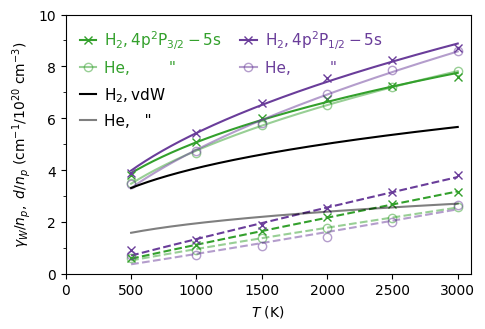

In [23]:
colors = {
    #'H2_4p3/2-5s': plt.get_cmap('tab20b')(0.85), 'He_4p3/2-5s': plt.get_cmap('tab20b')(0.65), 
    #'H2_4p1/2-5s': plt.get_cmap('tab20b')(0.05), 'He_4p1/2-5s': plt.get_cmap('tab20b')(0.45), 
    #'H2_4p3/2-5s': plt.get_cmap('Paired')(0.2), 'He_4p3/2-5s': plt.get_cmap('Paired')(0.7), 
    #'H2_4p1/2-5s': plt.get_cmap('Paired')(0.3), 'He_4p1/2-5s': plt.get_cmap('Paired')(0.8), 
    'H2_4p3/2-5s': plt.get_cmap('Paired')(0.3), 'He_4p3/2-5s': plt.get_cmap('Paired')(0.3), 
    'H2_4p1/2-5s': plt.get_cmap('Paired')(0.8), 'He_4p1/2-5s': plt.get_cmap('Paired')(0.8), 
    }
alpha = 0.5

model_T = np.arange(500, 3000+1e-6, 10)
#model_T = np.arange(0, 3000+1e-6, 10)

fig, ax = plt.subplots(figsize=(5,3.2))

line = ax.plot(model_T, get_param(model_T, 'H2_4p3/2-5s')[0], color=colors['H2_4p3/2-5s'])
ax.plot(model_T, get_param(model_T, 'H2_4p3/2-5s')[1], '--', color=colors['H2_4p3/2-5s'])
marker = ax.plot(T, w['H2_4p3/2-5s'], 'x', color=colors['H2_4p3/2-5s'])
ax.plot(T, d['H2_4p3/2-5s'], 'x', color=colors['H2_4p3/2-5s'])

handle_1 = (line[0], marker[0]); label_1 = r'$\mathrm{H_2,4p^2P_{3/2}-5s}$'

line = ax.plot(model_T, get_param(model_T, 'H2_4p1/2-5s')[0], color=colors['H2_4p1/2-5s'])
ax.plot(model_T, get_param(model_T, 'H2_4p1/2-5s')[1], '--', color=colors['H2_4p1/2-5s'])
marker = ax.plot(T, w['H2_4p1/2-5s'], 'x', color=colors['H2_4p1/2-5s'])
ax.plot(T, d['H2_4p1/2-5s'], 'x', color=colors['H2_4p1/2-5s'])

handle_2 = (line[0], marker[0]); label_2 = r'$\mathrm{H_2,4p^2P_{1/2}-5s}$'

line = ax.plot(model_T, get_param(model_T, 'He_4p3/2-5s')[0], color=colors['He_4p3/2-5s'], alpha=alpha)
ax.plot(model_T, get_param(model_T, 'He_4p3/2-5s')[1], '--', color=colors['He_4p3/2-5s'], alpha=alpha)
marker = ax.plot(T, w['He_4p3/2-5s'], 'o', mfc='none', color=colors['He_4p3/2-5s'], alpha=alpha)
ax.plot(T, d['He_4p3/2-5s'], 'o', mfc='none', color=colors['He_4p3/2-5s'], alpha=alpha)

handle_3 = (line[0], marker[0]); label_3 = r'$\mathrm{He,4p^2P_{3/2}-5s}$'

line = ax.plot(model_T, get_param(model_T, 'He_4p1/2-5s')[0], color=colors['He_4p1/2-5s'], alpha=alpha)
ax.plot(model_T, get_param(model_T, 'He_4p1/2-5s')[1], '--', color=colors['He_4p1/2-5s'], alpha=alpha)
marker = ax.plot(T, w['He_4p1/2-5s'], 'o', mfc='none', color=colors['He_4p1/2-5s'], alpha=alpha)
ax.plot(T, d['He_4p1/2-5s'], 'o', mfc='none', color=colors['He_4p1/2-5s'], alpha=alpha)

handle_4 = (line[0], marker[0]); label_4 = r'$\mathrm{He,4p^2P_{1/2}-5s}$'

label_3, label_4 = 'He,        "', 'He,        "'

line = ax.plot(model_T, get_gamma_vdW(model_T, key='H2'), color='k')
handle_vdW_1 = line[0]; label_vdW_1 = r'$\mathrm{H_2,vdW}$'
line = ax.plot(model_T, get_gamma_vdW(model_T, key='He'), color='k', alpha=alpha)
handle_vdW_2 = line[0]; label_vdW_2 = r'He,   "'

legend_kwargs = dict(
    frameon=False, labelcolor='linecolor', handlelength=1.1, handletextpad=0.5, 
    labelspacing=0.6, columnspacing=1.2, prop={'size':11}, 
)
ax.legend(
    loc='upper left', bbox_to_anchor=(0,1.0), 
    handles=[handle_1,handle_3,handle_2,handle_4], 
    labels=[label_1,label_3,label_2,label_4], 
    ncols=2, **legend_kwargs
)
new_ax = ax.twinx()
new_ax.legend(
    loc='upper left', bbox_to_anchor=(0,0.78), handles=[handle_vdW_1,handle_vdW_2], 
    labels=[label_vdW_1,label_vdW_2], **legend_kwargs
)
new_ax.axis('off')

ax.set(
    xlim=(0,3100), ylim=(0,10.), 
    ylabel=r'$\gamma_W/n_p,\ d/n_p\ \left(\mathrm{cm^{-1} / 10^{20}\ cm^{-3}}\right)$', 
    xlabel=r'$T\ (\mathrm{K})$'
    )
ax.set_yticks([1,3,5,7,9], labels=[], minor=True)

#plt.subplots_adjust(left=0.12, right=0.97, top=0.96, bottom=0.15)
plt.subplots_adjust(left=0.15, right=0.96, top=0.96, bottom=0.15)
plt.savefig('./plots/J_band_K_shift_param.pdf')
plt.show()